### 1. Ingesta de datos.

In [4]:
import pandas as pd
df = pd.read_csv('data/bank-additional-full.csv', sep=';')
df.head(15) 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2. Estudio de Variables

In [5]:
# Función para calcular el número de valores únicos por columna y sus porcentajes
unique_counts = df.nunique()
unique_percentages = df.nunique() / len(df) * 100

# Calcular los valores faltantes
missing_values = df.isnull().sum()
missing_percentages = df.isnull().mean() * 100

# Tipo de datos de cada columna
dtypes = df.dtypes

# Mostrar 4 valores únicos de cada columna como cadena de texto
sample_unique_values = df.apply(lambda x: ', '.join(map(str, x.dropna().unique()[:4])))

# Calcular el número de filas
num_rows = len(df)

# Resultados
eda_summary = pd.DataFrame({
    'Unique Values': unique_counts,
    'Unique (%)': unique_percentages,
    'Missing Values': missing_values,
    'Missing (%)': missing_percentages,
    'Dtype': dtypes,
    'Sample Unique Values': sample_unique_values
})

# Añadir el número de filas al resumen EDA
eda_summary.loc['Números de Filas'] = [num_rows, '', '', '', '', '']

# Mostrar el resumen EDA
eda_summary

,Unique Values,Unique (%),Missing Values,Missing (%),Dtype,Sample Unique Values
age,78,0.189376,0,0.0,int64,"56, 57, 37, 40"
job,12,0.029135,0,0.0,object,"housemaid, services, admin., blue-collar"
marital,4,0.009712,0,0.0,object,"married, single, divorced, unknown"
education,8,0.019423,0,0.0,object,"basic.4y, high.school, basic.6y, basic.9y"
default,3,0.007284,0,0.0,object,"no, unknown, yes"
housing,3,0.007284,0,0.0,object,"no, yes, unknown"
loan,3,0.007284,0,0.0,object,"no, yes, unknown"
contact,2,0.004856,0,0.0,object,"telephone, cellular"
month,10,0.024279,0,0.0,object,"may, jun, jul, aug"
day_of_week,5,0.012139,0,0.0,object,"mon, tue, wed, thu"


### 3. Valores únicos

In [6]:
for col in df.columns:
    print(f'Columna: {col}')
    print(df[col].unique())
    print('---')
# Columnas con unknown: job marital education default housing loan

Columna: age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
---
Columna: job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
---
Columna: marital
['married' 'single' 'divorced' 'unknown']
---
Columna: education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
---
Columna: default
['no' 'unknown' 'yes']
---
Columna: housing
['no' 'yes' 'unknown']
---
Columna: loan
['no' 'yes' 'unknown']
---
Columna: contact
['telephone' 'cellular']
---
Columna: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
---
Columna: day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
---
Columna: duration
[ 261  149  226 ... 1246 1556 1868]
---
Colum

### 4. Se decide no eliminar los "unknown" ya que elimina cerca del 26% de datos

In [ ]:
# No ejecutar
columnas_a_limpiar = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Elimina filas donde CUALQUIERA de esas columnas tenga "unknown"
df_limpio = df[~df[columnas_a_limpiar].isin(['unknown']).any(axis=1)]


In [ ]:
# No ejecutar
total_filas = len(df)
filas_filtradas = len(df_limpio)
filas_eliminadas = total_filas - filas_filtradas
porcentaje = (filas_eliminadas / total_filas) * 100

print(f'Se eliminaron {filas_eliminadas} filas ({porcentaje:.2f}%) por tener "unknown" en alguna de esas columnas.')


Se eliminaron 10700 filas (25.98%) por tener "unknown" en alguna de esas columnas.


### 5. Estudio de Balanceo Variable objetivo
- Hay desbalance extremo y puede afectar al modelo: predice bien solo la clase mayoritaria y falla en la minoritaria.
- Generalmente, se considera desbalanceado si una clase tiene más del 60-70% del total. Y aca tenemos mas 88% de los no
- Predicirá bien solo los no, pero los si no lo predecirá bien.

In [8]:
# Conteo de clases
conteo = df['y'].value_counts()

# Porcentaje por clase
porcentaje = df['y'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Conteo de clases:")
print(conteo)
print("\nPorcentaje de clases:")

Conteo de clases:
y
no     36548
yes     4640
Name: count, dtype: int64

Porcentaje de clases:


### 6. Preprocesamientos
- Para escalado usaré "StandardScaler". Para Arboles no se ven perjudicados ni ayudados por esto
- Transformas columnas categóricas con one hot

In [37]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'campaign', 'pdays', 'previous',
                'emp.var.rate', 'cons.price.idx',
                'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(df[numeric_cols])

In [38]:
from sklearn.preprocessing import OneHotEncoder

# Definir columnas categóricas
categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Crear el codificador (usando sparse_output en vez de sparse)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Aplicar el codificador directamente sobre las columnas categóricas
X_categorical_encoded = encoder.fit_transform(df[categorical_cols])



### 7. Juntar todo y guardar dataframe preprocesado

In [40]:
import pandas as pd
import numpy as np

# 1. Convertir arrays a DataFrames
df_numericas_escaladas = pd.DataFrame(X_numeric_scaled, columns=numeric_cols)

# Obtener los nombres de las columnas codificadas
encoded_col_names = encoder.get_feature_names_out(categorical_cols)
df_categoricas_codificadas = pd.DataFrame(X_categorical_encoded, columns=encoded_col_names)

# 2. Unir numéricas y categóricas horizontalmente
df_features = pd.concat([df_numericas_escaladas, df_categoricas_codificadas], axis=1)

# 3. Agregar la variable objetivo desde df ORIGINAL pero con 0 y 1
df_features['y'] = df['y'].map({'no': 0, 'yes': 1})

In [41]:
df_features

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
41184,0.573445,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
41185,1.533034,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
41186,0.381527,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [48]:
# Guardar Dataframe
df_features.to_csv('data/bank.csv', index=False)

### 8. verificación de que todo salió bien

In [33]:
# Función para calcular el número de valores únicos por columna y sus porcentajes
unique_counts = df_features.nunique()
unique_percentages = df_features.nunique() / len(df_features) * 100

# Calcular los valores faltantes
missing_values = df_features.isnull().sum()
missing_percentages = df_features.isnull().mean() * 100

# Tipo de datos de cada columna
dtypes = df_features.dtypes

# Mostrar 4 valores únicos de cada columna como cadena de texto
sample_unique_values = df_features.apply(lambda x: ', '.join(map(str, x.dropna().unique()[:4])))

# Calcular el número de filas
num_rows = len(df_features)

# Resultados
eda_summary = pd.DataFrame({
    'Unique Values': unique_counts,
    'Unique (%)': unique_percentages,
    'Missing Values': missing_values,
    'Missing (%)': missing_percentages,
    'Dtype': dtypes,
    'Sample Unique Values': sample_unique_values
})

# Añadir el número de filas al resumen EDA
eda_summary.loc['Números de Filas'] = [num_rows, '', '', '', '', '']

# Mostrar el resumen EDA
eda_summary

,Unique Values,Unique (%),Missing Values,Missing (%),Dtype,Sample Unique Values
age,78,0.189376,0,0.0,float64,"1.533034287255948, 1.628993230905577, -0.29018..."
campaign,42,0.101971,0,0.0,float64,"-0.5659219741930245, -0.2049085263557372, 0.15..."
pdays,27,0.065553,0,0.0,float64,"0.1954139001271294, -5.1173421546592595, -5.12..."
previous,8,0.019423,0,0.0,float64,"-0.34949428419757467, 1.6711360607672916, 3.69..."
emp.var.rate,10,0.024279,0,0.0,float64,"0.6480922665892298, 0.8390606499069391, -0.115..."
...,...,...,...,...,...,...
poutcome_nonexistent,2,0.004856,0,0.0,float64,"1.0, 0.0"
poutcome_success,2,0.004856,0,0.0,float64,"0.0, 1.0"
y,2,0.004856,0,0.0,object,"no, yes"
y_binaria,2,0.004856,0,0.0,int64,"0, 1"


✔️ PCA (Análisis de Componentes Principales)
- Reduce la dimensionalidad a 2 o 3 dimensiones, para que puedas graficar puntos.
- Sirve para graficar la distribución de tus clientes y colorear según y.

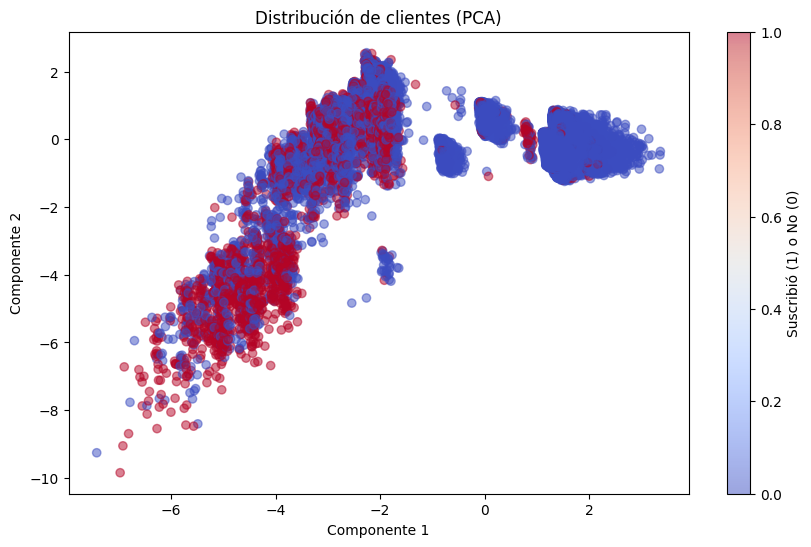

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Suponé que X es tu matriz de features preprocesadas
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_features.drop(columns=['y']))

# Visualizamos
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_features['y'], cmap='coolwarm', alpha=0.5)
plt.title('Distribución de clientes (PCA)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Suscribió (1) o No (0)')
plt.show()


In [47]:
plt.savefig("pca_plot.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [44]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_features.drop(columns=['y']))

# Mostrar cuánta varianza explica cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

# Mostrar pesos (cargas) de cada variable original en los componentes
loadings = pd.Series(pca.components_[0], index=df_features.columns[:-1])  # sin y
print("\nContribución de cada variable a la 1ra componente:")
print(loadings.sort_values(ascending=False).head(10))


Varianza explicada por cada componente: [0.28086961 0.09783034]

Contribución de cada variable a la 1ra componente:
euribor3m               0.474389
emp.var.rate            0.472202
nr.employed             0.451706
cons.price.idx          0.363314
pdays                   0.219067
contact_telephone       0.113122
poutcome_nonexistent    0.106572
cons.conf.idx           0.103516
campaign                0.096320
month_jul               0.051025
dtype: float64


Text(0.5, 1.0, 'Clusters de clientes (KMeans)')

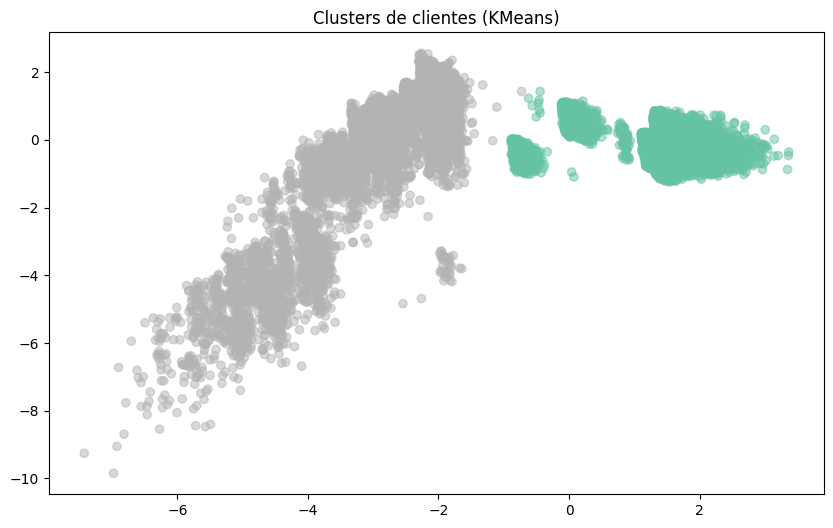

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_features.drop(columns=['y']))

# Comparás con las clases reales
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2', alpha=0.5)
plt.title('Clusters de clientes (KMeans)')


Selección de variables

In [50]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import pandas as pd

In [52]:
# 1. Definir X e y
X = df_features.drop(columns=['y'])  # Todas las columnas excepto y
y = df_features['y']                 # Variable objetivo (ya en 0 y 1)

# 2. Crear modelo base para selección de variables
modelo_rf = RandomForestClassifier(random_state=42)

# 3. RFECV con validación cruzada automática
cv = StratifiedKFold(n_splits=5)
selector = RFECV(estimator=modelo_rf, step=1, cv=cv, scoring='accuracy')
selector.fit(X, y)

# 4. Ver resultados
print(f"✅ Columnas seleccionadas automáticamente: {selector.n_features_} de {X.shape[1]}")
columnas_seleccionadas = X.columns[selector.support_]
print("\n📌 Nombres de columnas seleccionadas:")
print(list(columnas_seleccionadas))


✅ Columnas seleccionadas automáticamente: 3 de 62

📌 Nombres de columnas seleccionadas:
['age', 'euribor3m', 'nr.employed']


In [53]:

# 5. Crear nuevo DataFrame con las columnas seleccionadas + y
df_reducido = df_features[columnas_seleccionadas].copy()
df_reducido['y'] = y

# 6. (Opcional) Evaluar performance con y sin selección
score_todas = cross_val_score(modelo_rf, X, y, cv=5).mean()
score_reducidas = cross_val_score(modelo_rf, df_reducido.drop(columns=['y']), y, cv=5).mean()

print(f"\n🔍 Score con todas las columnas:     {score_todas:.4f}")
print(f"✅ Score con columnas seleccionadas: {score_reducidas:.4f}")


🔍 Score con todas las columnas:     0.3972
✅ Score con columnas seleccionadas: 0.4903


Seleccion de variables 2

In [54]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from tqdm import tqdm
import pandas as pd
import numpy as np

In [55]:
# Datos
X = df_features.drop(columns=['y'])
y = df_features['y']

# Configurar modelo
modelo_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Validación cruzada
cv = StratifiedKFold(n_splits=3)

# Progreso con tqdm + monkeypatch para sklearn
from sklearn.utils import parallel_backend
from joblib import parallel_backend as joblib_backend

class TQDMProgressBar:
    def __init__(self, total):
        self.pbar = tqdm(total=total)

    def __call__(self, i):
        self.pbar.update()

# Inicializamos RFECV con métrica adecuada
selector = RFECV(
    estimator=modelo_rf,
    step=5,
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

print("⏳ Buscando columnas más relevantes con RFECV (esto puede tardar unos minutos)...")

# Ejecutar con progreso
with joblib_backend('loky'):
    selector.fit(X, y)

# Mostrar resultado
print(f"\n✅ Columnas seleccionadas automáticamente: {selector.n_features_} de {X.shape[1]}")
columnas_seleccionadas = X.columns[selector.support_]
print("\n📌 Nombres de columnas seleccionadas:")
print(list(columnas_seleccionadas))

⏳ Buscando columnas más relevantes con RFECV (esto puede tardar unos minutos)...

✅ Columnas seleccionadas automáticamente: 2 de 62

📌 Nombres de columnas seleccionadas:
['age', 'euribor3m']


In [56]:
# Crear nuevo DataFrame reducido
df_reducido2 = df_features[columnas_seleccionadas].copy()
df_reducido2['y'] = y

# Evaluar rendimiento con y sin reducción
print("\n🔍 Evaluando rendimiento con F1 score...")
score_todas = cross_val_score(modelo_rf, X, y, cv=5, scoring='f1').mean()
score_reducidas = cross_val_score(modelo_rf, df_reducido2.drop(columns=['y']), y, cv=5, scoring='f1').mean()

print(f"\n📊 F1 score con todas las columnas:     {score_todas:.4f}")
print(f"✅ F1 score con columnas seleccionadas: {score_reducidas:.4f}")


🔍 Evaluando rendimiento con F1 score...

📊 F1 score con todas las columnas:     0.0431
✅ F1 score con columnas seleccionadas: 0.0604
